In [4]:
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model

In [12]:
df = pd.read_csv('infolimpioavanzadoTarget.csv', index_col=False)
df.head(5)

,date,open,high,low,close,adjclose,volume,ticker,RSIadjclose15,RSIvolume15,...,high-15,K-15,D-15,stochastic-k-15,stochastic-d-15,stochastic-kd-15,volumenrelativo,diff,INCREMENTO,TARGET
0,2022-01-03,17.799999,18.219000,17.500000,17.760000,17.760000,106600,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.919758,-1.900001,-9.664295,0.0
1,2022-01-04,17.700001,18.309999,17.620001,17.660000,17.660000,128700,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.110440,-1.379999,-7.247895,0.0
2,2022-01-05,17.580000,17.799999,16.910000,16.950001,16.950001,103100,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.889560,-0.930000,-5.201344,0.0
3,2022-01-06,16.650000,16.879999,16.139999,16.170000,16.170000,173600,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.497843,-0.360000,-2.177856,0.0
4,2022-01-07,16.219999,16.290001,15.630000,15.710000,15.710000,137800,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.188956,-0.120000,-0.758054,0.0


In [13]:

print("Dataframe Shape:", df.shape)
print("Null Value Present:", df.isnull().values.any())

Dataframe Shape: (2332, 1285)
Null Value Present: True


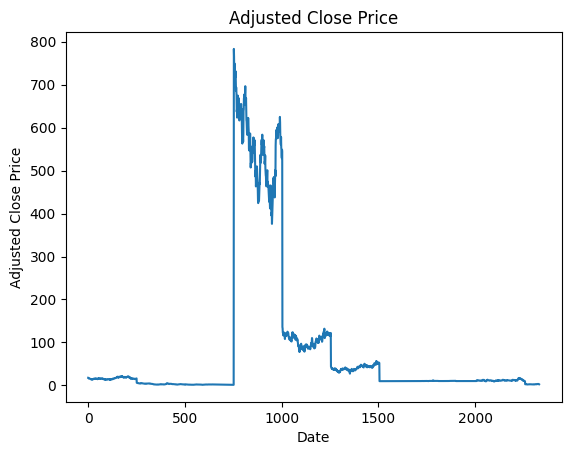

In [16]:
df['adjclose'].plot(title='Adjusted Close Price')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.show()

In [19]:
print("Column Names:", df.columns)



Column Names: Index(['date', 'open', 'high', 'low', 'close', 'adjclose', 'volume', 'ticker',
       'RSIadjclose15', 'RSIvolume15',
       ...
       'high-15', 'K-15', 'D-15', 'stochastic-k-15', 'stochastic-d-15',
       'stochastic-kd-15', 'volumenrelativo', 'diff', 'INCREMENTO', 'TARGET'],
      dtype='object', length=1285)


In [20]:
# Create a DataFrame for the 'adjclose' column
output_var = pd.DataFrame(df['adjclose'])

# Define the list of features
features = ['Open', 'High', 'Low', 'Volume']

# Display the new DataFrame and the features list to verify
print(output_var.head())
print("Features:", features)

    adjclose
0  17.760000
1  17.660000
2  16.950001
3  16.170000
4  15.710000
Features: ['Open', 'High', 'Low', 'Volume']


In [22]:
missing_features = [feature for feature in features if feature not in df.columns]
if missing_features:
    print(f"Missing features in the DataFrame: {missing_features}")
else:
    # Scale the feature columns using MinMaxScaler
    scaler = MinMaxScaler()
    feature_transform = scaler.fit_transform(df[features])

    # Create a new DataFrame for the scaled features
    feature_transform = pd.DataFrame(columns=features, data=feature_transform, index=df.index)

    # Display the first few rows of the scaled features DataFrame
    print("Scaled Features:")
    print(feature_transform.head())

Missing features in the DataFrame: ['Open', 'High', 'Low', 'Volume']


In [32]:
# Check if all feature columns exist in the DataFrame
missing_features = [feature for feature in features if feature not in df.columns]
if missing_features:
    print(f"Missing features in the DataFrame: {missing_features}")
else:
    # Create a DataFrame for the features and target
    X = df[features]
    y = df[target]

    # Scale the feature columns using MinMaxScaler
    scaler = MinMaxScaler()
    X_scaled = scaler.fit_transform(X)

    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

    # Initialize and train the model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print("Mean Squared Error:", mse)
    print("R-squared:", r2)

    # Plot the predicted vs actual values
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Actual vs Predicted Stock Prices')
    plt.show()

Missing features in the DataFrame: ['Open', 'High', 'Low', 'Volume']


In [40]:
missing_features = [feature for feature in features if feature not in df.columns]
if missing_features:
    print(f"Missing features in the DataFrame: {missing_features}")
else:
    # Scaling the features
    scaler = MinMaxScaler()
    feature_transform = scaler.fit_transform(df[features])

    # Convert to DataFrame to maintain original indexing
    feature_transform = pd.DataFrame(feature_transform, columns=features, index=df.index)

    # Display the first few rows of the scaled DataFrame
    feature_transform.head()

Missing features in the DataFrame: ['Open', 'High', 'Low', 'Volume']


SyntaxError: invalid syntax (<ipython-input-49-abcc785a8ae1>, line 14)